# Small Size Frozen Lake

In [12]:
import numpy as np
import gym
from gym import wrappers
import time
import sys
import matplotlib.pyplot as plt
import hiive.mdptoolbox as mdptoolbox
import hiive.mdptoolbox.example
import hiive.mdptoolbox.mdp



Bad key "text.kerning_factor" on line 4 in
C:\Division\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [13]:
def inference(pi, policy=None, n_trees=1000, n_episode=100, zero_start=True):
    """
    pi (mdptoolbox.mdp.PolicyIteration/ValueIteration/QLearning)
    policy (list): None to use default policy
    n_trees (int): number of tree to simulate
    n_episode (int): number of sequential episode (good to be larger than N)
    zero_start (bool): whether initialize trees with zero ages or not
    
    return: (list) mean_rewards_curve (len: n_episode)
    """

    # extract parameters
    P, R = pi.P, pi.R
    r1, r2 = R[0][-1], R[1][-1]
    N, p = len(R[0]), P[0][0, 0]

    if type(policy) == type(None):
        policy = pi.policy
    policy = np.array(policy)
    wait_states = set(np.where(policy == 0)[0])

    # set hyper-parameters
    if zero_start:
        states = np.zeros((n_trees), dtype=np.uint8)  # start with 0 age
    else:
        states = np.random.randint(N, size=(n_trees))

    # start simulation
    # TODO: vectorize
    mean_rewards_curve = np.zeros((n_episode))
    for episode in range(n_episode):
        rewards = np.zeros((n_trees))

        # compute reward, then transition
        for i in range(n_trees):
            state = states[i]  # state for curr tree
            rewards[i] = R[0][state] if state in wait_states else R[1][state]

            is_fired = np.random.choice(2, p=[1-p, p])
            if state in wait_states:
                states[i] = min(state+1, N-1) if not is_fired else 0
            else:
                states[i] = 0

        mean_rewards_curve[episode] = np.mean(rewards)

    return mean_rewards_curve

def get_v_variation(results):
    rewards = []
    for item in results:
        rewards.append(item['Reward'])
    variation = np.diff(rewards)

    return variation

In [14]:
P, R = hiive.mdptoolbox.example.forest(S=2000)


# Value Iteration

In [15]:
# figsize
size = (10, 6)

iters_vi = []
for p in range(0, 10, 1):
    p /= 20
    P, R = hiive.mdptoolbox.example.forest(S=2000, p=p)
    vi = hiive.mdptoolbox.mdp.ValueIteration(
        P, R, gamma=0.99, epsilon=0.00001, max_iter=10000)
    vi.run()
    iters_vi.append(vi.iter)


In [16]:
iters_vi


[1741, 286, 152, 102, 76, 59, 48, 40, 34, 29]

[1741, 286, 152, 102, 76, 59, 48, 40, 34, 29]

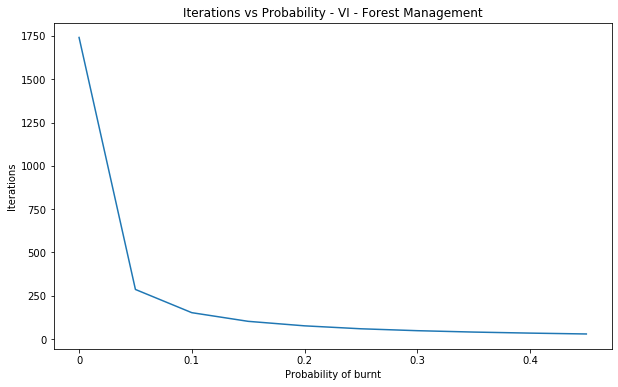

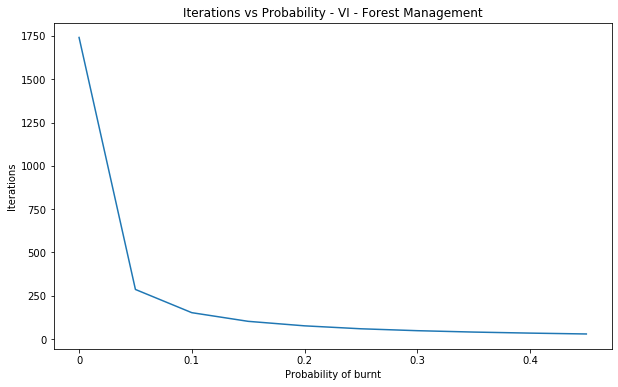

In [17]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Iterations vs Probability - VI - Forest Management")
g.set_xticklabels([0, 0, 0.1, 0.2,0.3, 0.4, 0.5])
g.set_ylabel('Iterations')
g.set_xlabel('Probability of burnt')
g.plot(iters_vi)


In [18]:
vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma=0.99, epsilon=0.00001, max_iter=10000)
res_vi = vi.run()

In [19]:
stats_vi = vi.run_stats

In [20]:
stats_vi

[{'State': None,
  'Action': None,
  'Reward': 4.0,
  'Error': 4.0,
  'Time': 0.003426790237426758,
  'Max V': 4.0,
  'Mean V': 1.001,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 6.178,
  'Error': 2.178,
  'Time': 0.006855964660644531,
  'Max V': 6.178,
  'Mean V': 1.00295025,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 7.6064957500000006,
  'Error': 1.1859210000000004,
  'Time': 0.00986623764038086,
  'Max V': 7.6064957500000006,
  'Mean V': 1.542746450625,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 8.492378737000001,
  'Error': 0.6457339845000003,
  'Time': 0.013016939163208008,
  'Max V': 8.492378737000001,
  'Mean V': 1.783889491224812,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 9.15364702655894,
  'Error': 0.3516021545602508,
  'Time': 0.01595902442932129,
  'Max V': 9.15364702655894,
  'Mean V': 2.1818077670181237,
  'Iteration': 5},
 {'State': None,
  'Action': None,
  'Reward': 9.651663873

[{'State': None,
  'Action': None,
  'Reward': 4.0,
  'Error': 4.0,
  'Time': 0.003682374954223633,
  'Max V': 4.0,
  'Mean V': 1.001,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 6.178,
  'Error': 2.178,
  'Time': 0.00658869743347168,
  'Max V': 6.178,
  'Mean V': 1.00295025,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 7.6064957500000006,
  'Error': 1.1859210000000004,
  'Time': 0.01006007194519043,
  'Max V': 7.6064957500000006,
  'Mean V': 1.542746450625,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 8.492378737000001,
  'Error': 0.6457339845000003,
  'Time': 0.012236595153808594,
  'Max V': 8.492378737000001,
  'Mean V': 1.783889491224812,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 9.15364702655894,
  'Error': 0.3516021545602508,
  'Time': 0.015809059143066406,
  'Max V': 9.15364702655894,
  'Mean V': 2.1818077670181237,
  'Iteration': 5},
 {'State': None,
  'Action': None,
  'Reward': 9.651663873

In [21]:
inference(vi, n_episode=100).mean()

0.35119999999999996

0.35307

In [22]:
policy_vi = np.array(vi.policy)
wait_vi = np.arange(len(policy_vi))
wait_vi[np.where(policy_vi == 0)]


array([   0, 1997, 1998, 1999])

array([   0, 1997, 1998, 1999])

In [ ]:
rewards_vi = [i['Reward'] for i in stats_vi]
error_vi = [i['Error'] for i in stats_vi]
time_vi = [i['Time'] for i in stats_vi]
maxV_vi = [i['Max V'] for i in stats_vi]
meanV_vi = [i['Mean V'] for i in stats_vi]


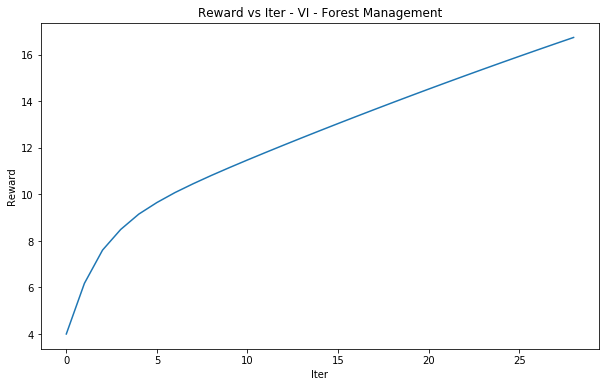

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Reward vs Iter - VI - Forest Management")
g.set_ylabel('Reward')
g.set_xlabel('Iter')
g.plot(rewards_vi)

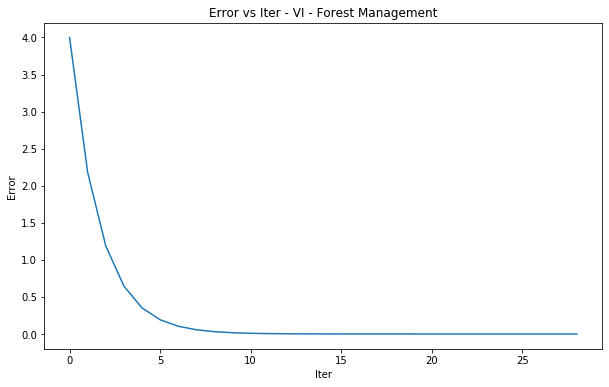

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Error vs Iter - VI - Forest Management")
g.set_ylabel('Error')
g.set_xlabel('Iter')
g.plot(error_vi)


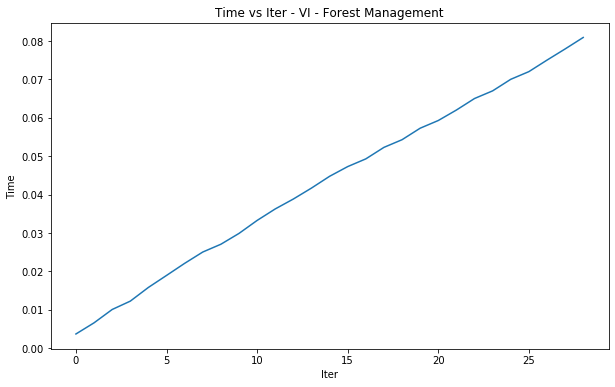

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Time vs Iter - VI - Forest Management")
g.set_ylabel('Time')
g.set_xlabel('Iter')
g.plot(time_vi)


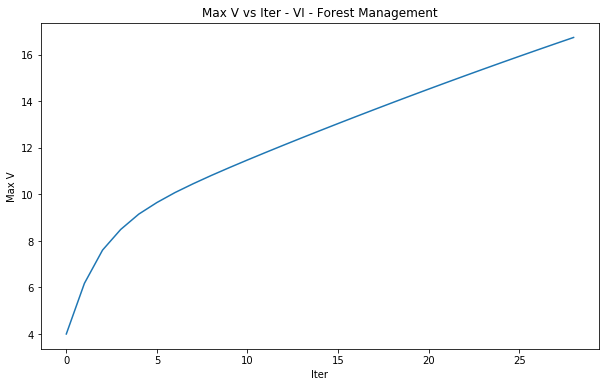

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Max V vs Iter - VI - Forest Management")
g.set_ylabel('Max V')
g.set_xlabel('Iter')
g.plot(maxV_vi)


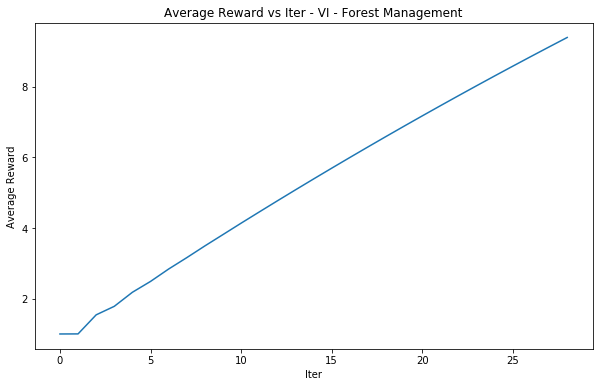

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Average Reward vs Iter - VI - Forest Management")
g.set_ylabel('Average Reward')
g.set_xlabel('Iter')
g.plot(meanV_vi)

In [ ]:
delta_vi = get_v_variation(stats_vi)

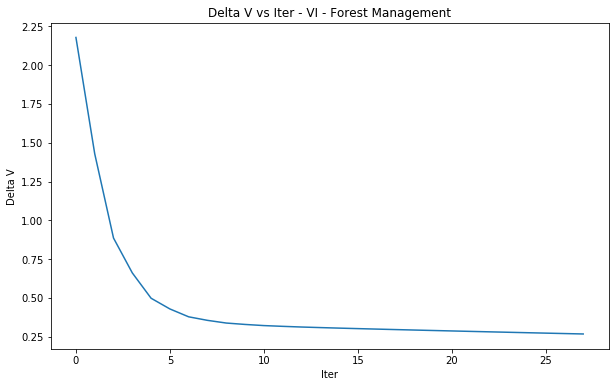

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Delta V vs Iter - VI - Forest Management")
g.set_ylabel('Delta V')
g.set_xlabel('Iter')
g.plot(delta_vi)


# Policy Iteration

In [ ]:
pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma=0.99, max_iter=8)
pi.run()

[{'State': None,
  'Action': None,
  'Reward': 43.261720797461585,
  'Error': 3.3601345235865736,
  'Time': 0.10756111145019531,
  'Max V': 43.261720797461585,
  'Mean V': 35.904942611774544,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 43.261720797461585,
  'Error': 1.1821345235865763,
  'Time': 0.22242140769958496,
  'Max V': 43.261720797461585,
  'Mean V': 35.906622679036346,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 43.261720797461585,
  'Error': 7.105427357601002e-15,
  'Time': 0.3292555809020996,
  'Max V': 43.261720797461585,
  'Mean V': 35.90721374629812,
  'Iteration': 3}]

In [ ]:
pi.time

0.3292555809020996

In [ ]:
stats_pi = pi.run_stats

In [ ]:
inference(pi, n_episode=100).mean()


0.35323

In [ ]:
policy_pi = np.array(pi.policy)
wait_pi = np.arange(len(policy_pi))
wait_pi[np.where(policy_pi == 0)]


array([   0, 1997, 1998, 1999])

In [ ]:
rewards_pi = [i['Reward'] for i in stats_pi]
error_pi = [i['Error'] for i in stats_pi]
time_pi = [i['Time'] for i in stats_pi]
V0_pi = [i['V[0]'] for i in stats_pi]
meanV_pi = [i['Mean V'] for i in stats_pi]


KeyError: 'V[0]'

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Reward vs Iter - PI - Forest Management")
g.set_ylabel('Reward')
g.set_xlabel('Iter')
g.plot(rewards_pi)

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Error vs Iter - PI - Forest Management")
g.set_ylabel('Error')
g.set_xlabel('Iter')
g.plot(error_pi)


In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Time vs Iter - PI - Forest Management")
g.set_ylabel('Time')
g.set_xlabel('Iter')
g.plot(time_pi)


In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("V0 vs Iter - PI - Forest Management")
g.set_ylabel('V0')
g.set_xlabel('Iter')
g.plot(V0_pi)

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Average Reward vs Iter - PI - Forest Management")
g.set_ylabel('Average Reward')
g.set_xlabel('Iter')
g.plot(meanV_pi)


In [ ]:
delta_pi = get_v_variation(stats_pi)

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Error vs Iter - PI - Forest Management")
g.set_ylabel('Error')
g.set_xlabel('Iter')
g.plot(delta_pi)


# Q-Learning

In [37]:
q = hiive.mdptoolbox.mdp.QLearning(P, R, gamma=0.99, epsilon=0.03, epsilon_decay=1, alpha_decay=1, n_iter=1000000)
q.run()

[{'State': 251,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.1,
  'Time': 0.008000612258911133,
  'Alpha': 0.1,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 0.1,
  'Mean V': 0.0001,
  'Iteration': 100},
 {'State': 121,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.015002012252807617,
  'Alpha': 0.1,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 1.6155829733614957,
  'Mean V': 0.0015165597204080778,
  'Iteration': 200},
 {'State': 1886,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.023129940032958984,
  'Alpha': 0.1,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 3.1528573648669034,
  'Mean V': 0.0033727170333643012,
  'Iteration': 300},
 {'State': 1006,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.030145645141601562,
  'Alpha': 0.1,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 4.809870353375081,
  'Mean V': 0.005111771475295824,
  'Iteration': 400},
 {'State': 460,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.038240909576416016

In [38]:
q.time

95.47015762329102

In [39]:
inference(q, n_episode=100).mean()

0.35414

In [40]:
q.max_iter

1000000

In [41]:
policy_q = np.array(q.policy)
wait_q = np.arange(len(policy_q))
print(len(wait_q[np.where(policy_q == 0)]))
for i in wait_q[np.where(policy_q == 0)]:
    print(i, end=' ')


1699
0 3 5 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 34 35 36 37 38 39 41 42 43 44 45 46 47 48 49 50 53 54 55 56 57 58 59 61 62 63 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 85 86 88 89 90 93 95 96 97 98 99 100 101 102 103 104 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 123 124 126 128 129 131 132 133 134 135 136 137 138 139 140 142 143 144 146 147 148 150 152 155 156 157 159 160 162 163 164 165 166 167 168 170 171 172 173 174 175 176 177 178 179 181 182 183 184 185 186 187 189 190 191 192 193 194 195 196 197 198 200 201 202 203 204 205 206 207 208 209 211 212 213 214 216 217 218 219 220 221 222 223 224 225 226 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 252 253 254 255 256 257 258 259 261 262 263 264 265 266 267 268 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 290 291 292 293 294 295 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 313 314 315

In [42]:
stats_q = q.run_stats

In [43]:
rewards_q = [i['Reward'] for i in stats_q]
error_q = [i['Error'] for i in stats_q]
time_q = [i['Time'] for i in stats_q]
V0_q = [i['V[0]'] for i in stats_q]
maxV_q = [i['Max V'] for i in stats_q]
meanV_q = [i['Mean V'] for i in stats_q]


KeyError: 'V[0]'

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Reward vs Iter - QL - Forest Management")
g.set_ylabel('Reward')
g.set_xlabel('Iter')
g.plot(rewards_q)

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Error vs Iter - QL - Forest Management")
g.set_ylabel('Error')
g.set_xlabel('Iter')
g.plot(error_q)


In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Time vs Iter - QL - Forest Management")
g.set_ylabel('Time')
g.set_xlabel('Iter')
g.plot(time_q)


In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("V0 vs Iter - QL - Forest Management")
g.set_ylabel('V0')
g.set_xlabel('Iter')
g.plot(V0_q)

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Max V vs Iter - QL - Forest Management")
g.set_ylabel('Max V')
g.set_xlabel('Iter')
g.plot(maxV_q)


In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("Average Reward vs Iter - QL - Forest Management")
g.set_ylabel('Average Reward')
g.set_xlabel('Iter')
g.plot(meanV_q)


In [ ]:
delta_q = get_v_variation(stats_q)

In [ ]:
fig, g = plt.subplots(1, 1, figsize=size)

g.set_title("V variance vs Iter - QL - Forest Management")
g.set_ylabel('Variance')
g.set_xlabel('Iter')
g.plot(delta_q)


In [ ]:
environment = 'FrozenLake-v1'
env_ = gym.make(environment)
env_.reset()
print('VI test score:', test(env_, convertPolicy(env_, vi.policy), 10000))
print('PI test score:', test(env_, convertPolicy(env_, pi.policy), 10000))
print('QL test score:', test(env_, convertPolicy(env_, q.policy), 10000))


In [ ]:
print('VI test score: ', inference(vi, n_episode=100).mean())
print('PI test score:', inference(pi, n_episode=100).mean())
print('QL test score', inference(q, n_episode=100).mean())
